#### 1 .  Implement Linear Regression(Diabetes Dataset).

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\91773\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
diabetes = datasets.load_diabetes()

In [3]:
diabetes_df = pd.DataFrame(data=diabetes.data,columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

In [4]:
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [5]:
print("Dataset Shape:", diabetes_df.shape)
print("\nColumns:", diabetes_df.columns)
print("\nInfo:")
print(diabetes_df.info())
print("\nNull Values:")
print(diabetes_df.isnull().sum())

Dataset Shape: (442, 11)

Columns: Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None

Null Values:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [6]:
print("\nSummary Statistics:")
print(diabetes_df.describe())


Summary Statistics:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -3.634285e-16  1.308343e-16 -8.045349e-16  1.281655e-16 -8.835316e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123996e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665645e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670611e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564384e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320442e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   1.327024e-16 -4.574646e-16  3.777301e-16 -3.830854e-16 -3.412882e-16   
std    4.761905e-02  4.761905e

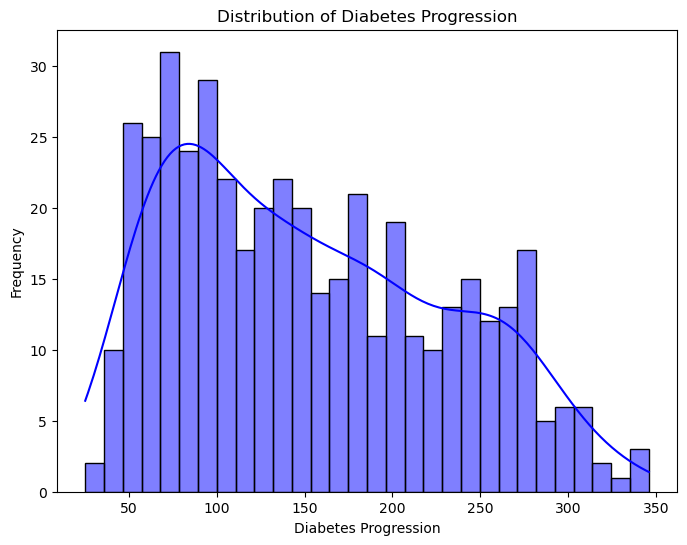

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(diabetes_df['target'], bins=30, kde=True, color='blue')
plt.title('Distribution of Diabetes Progression')
plt.xlabel('Diabetes Progression')
plt.ylabel('Frequency')
plt.show()

<Figure size 1200x1000 with 0 Axes>

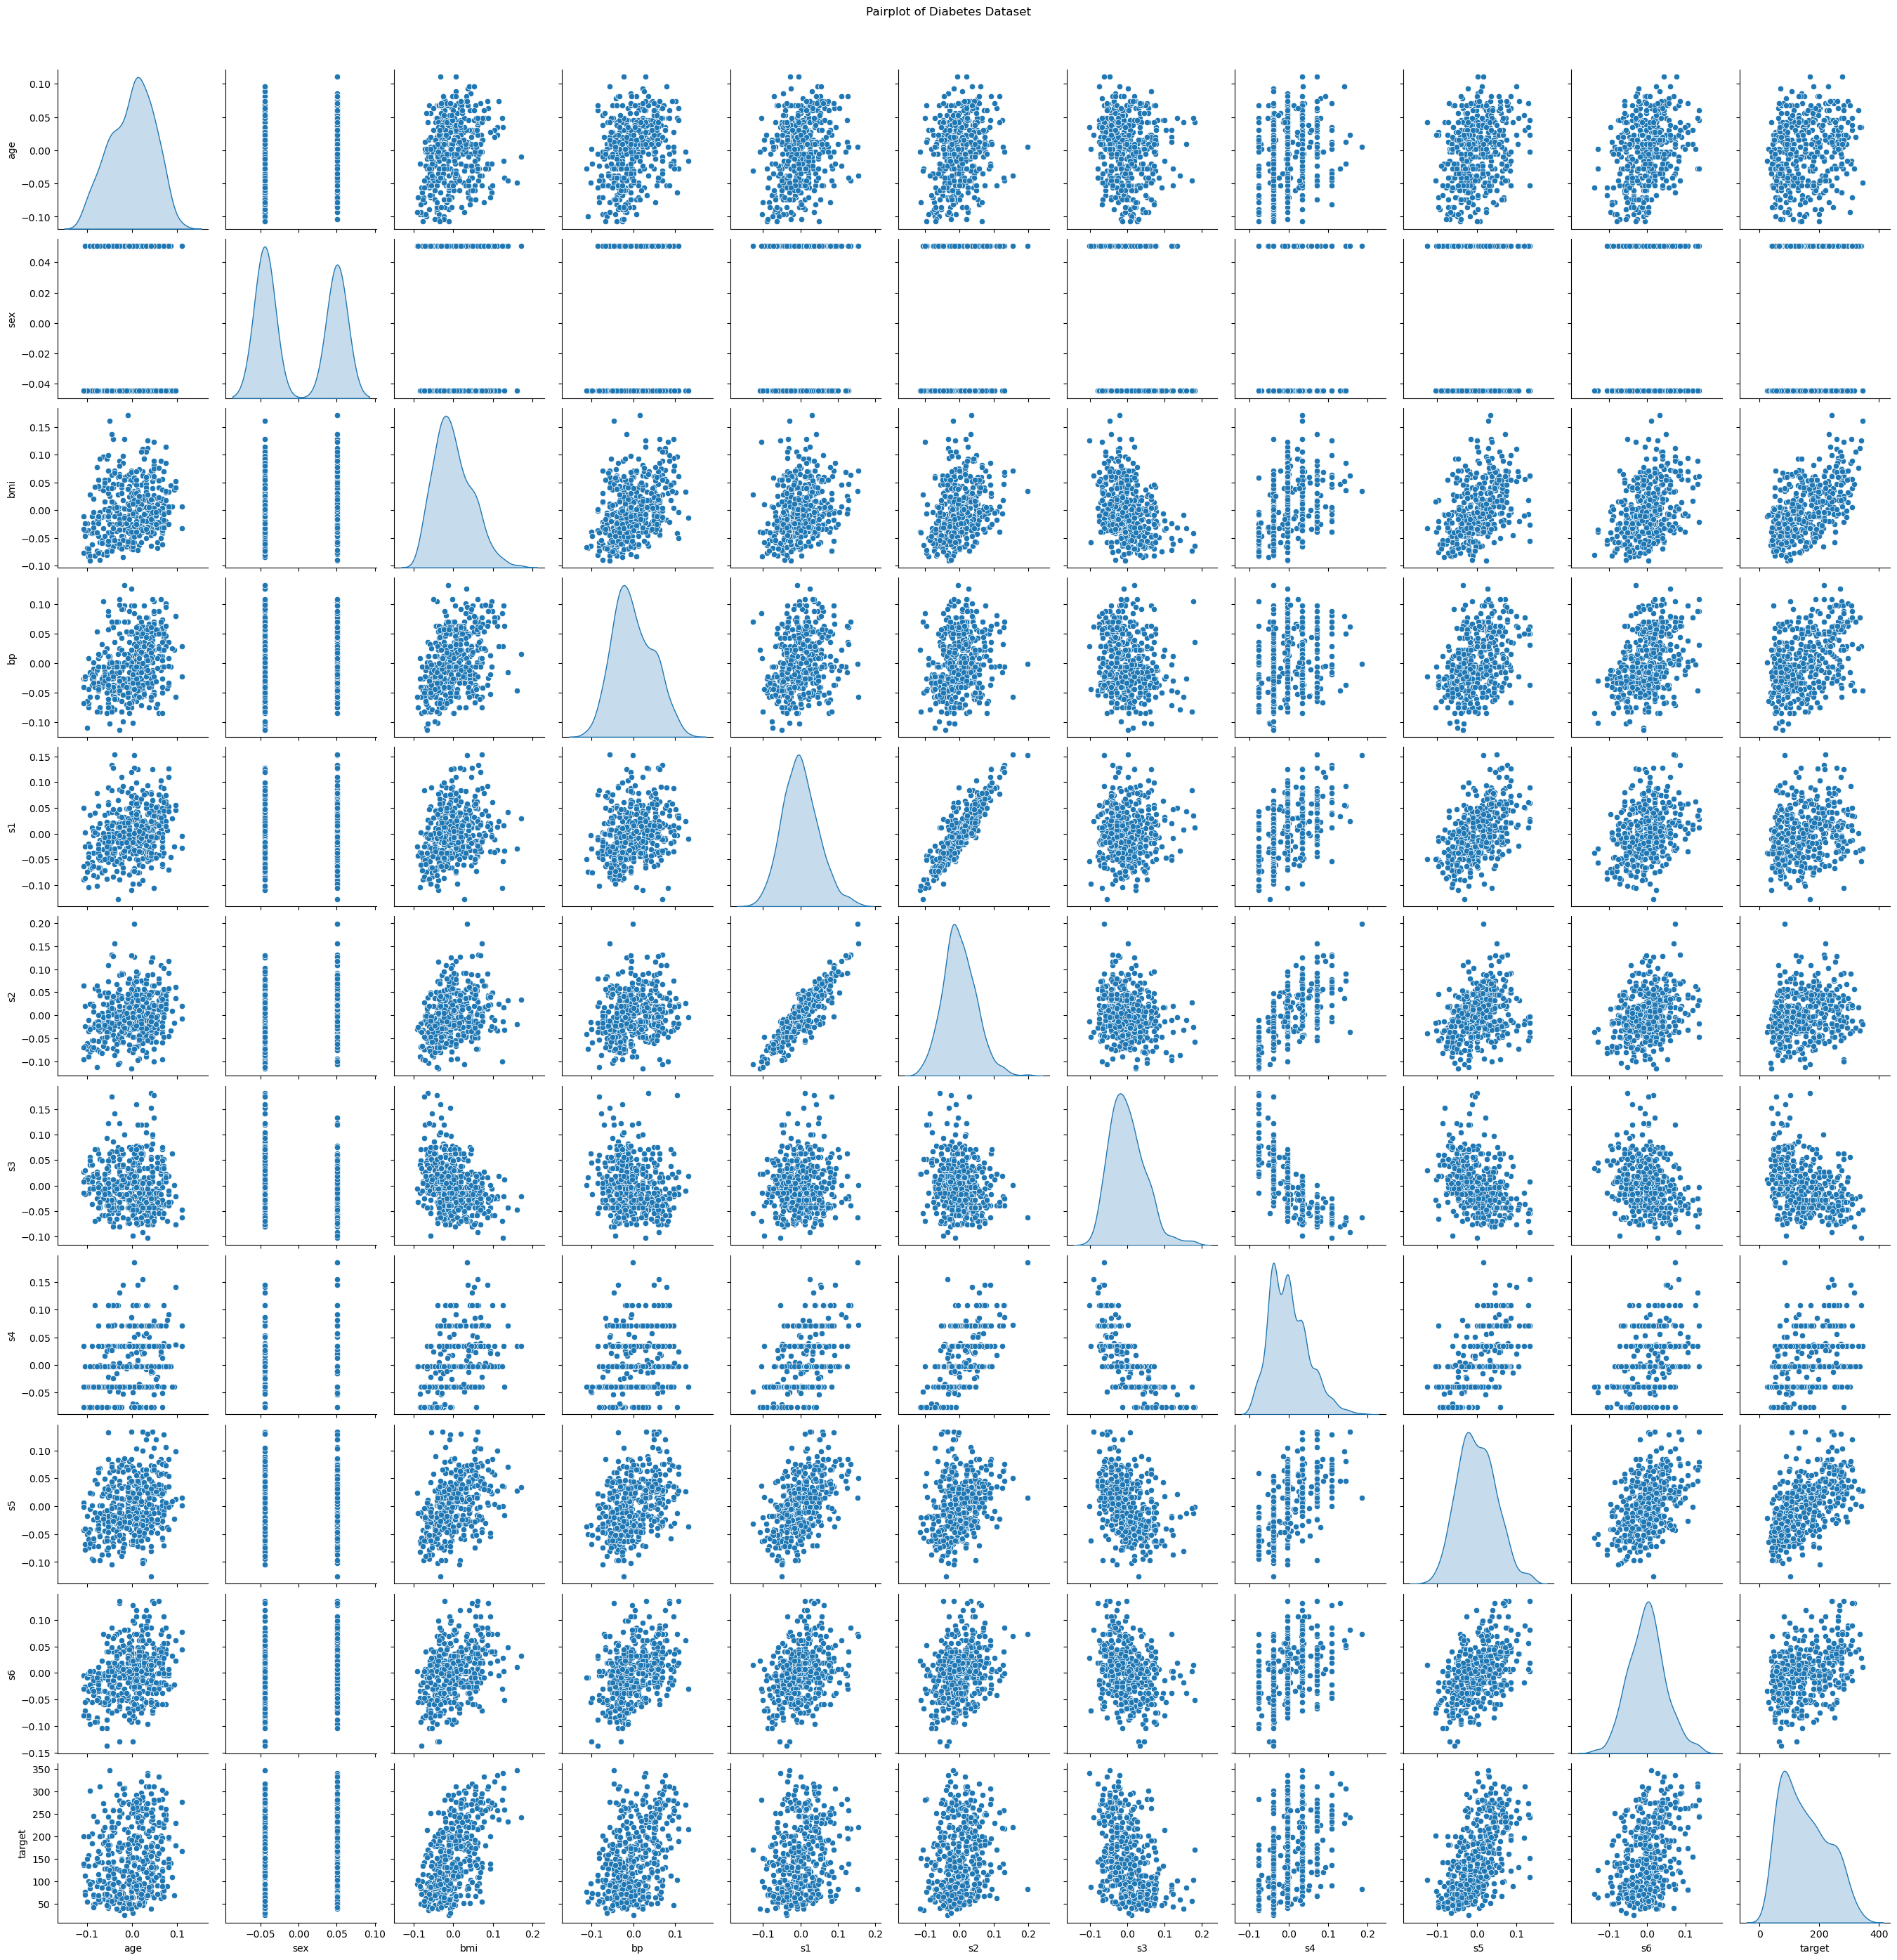

In [8]:
plt.figure(figsize=(12, 10))
sns.pairplot(diabetes_df, diag_kind='kde')
plt.suptitle("Pairplot of Diabetes Dataset", y=1.02)
plt.show()

In [9]:
X = diabetes_df.drop('target', axis=1) # Features
y = diabetes_df['target'] 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=123)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nMean Squared Error (MSE):", mse)
print("R-squared Score:", r2)


Mean Squared Error (MSE): 2724.2449144170114
R-squared Score: 0.5675916622351822


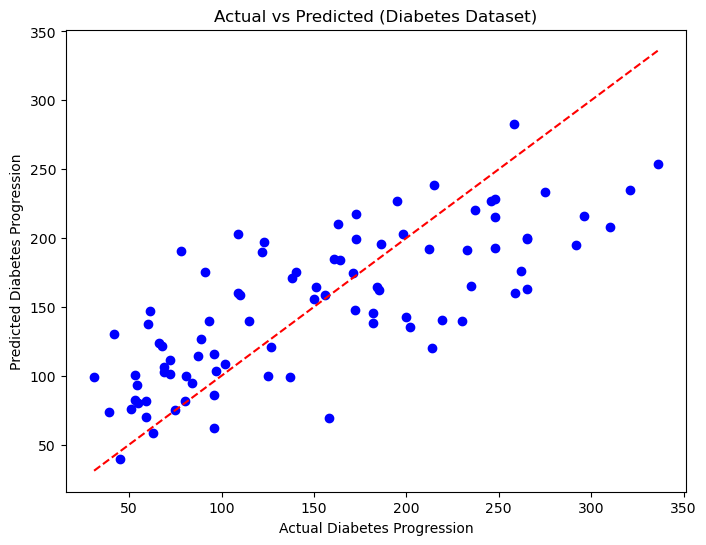

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual Diabetes Progression')
plt.ylabel('Predicted Diabetes Progression')
plt.title('Actual vs Predicted (Diabetes Dataset)')
plt.show()

#### 2. Implement Logistic Regression. (Iris Dataset)

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [16]:
iris = datasets.load_iris()

In [17]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [18]:
iris_df.shape

(150, 5)

In [19]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


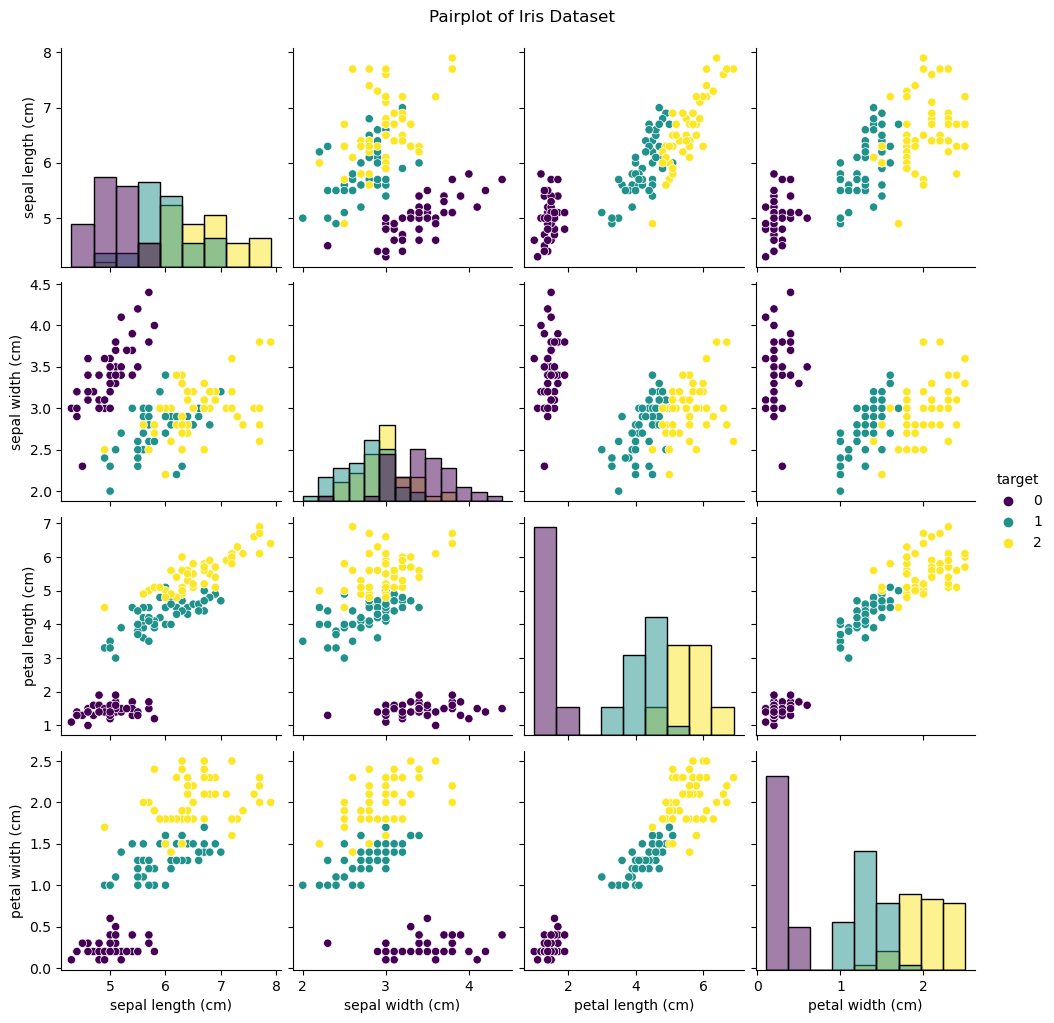

In [20]:
sns.pairplot(iris_df, hue='target', palette='viridis', diag_kind='hist')
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

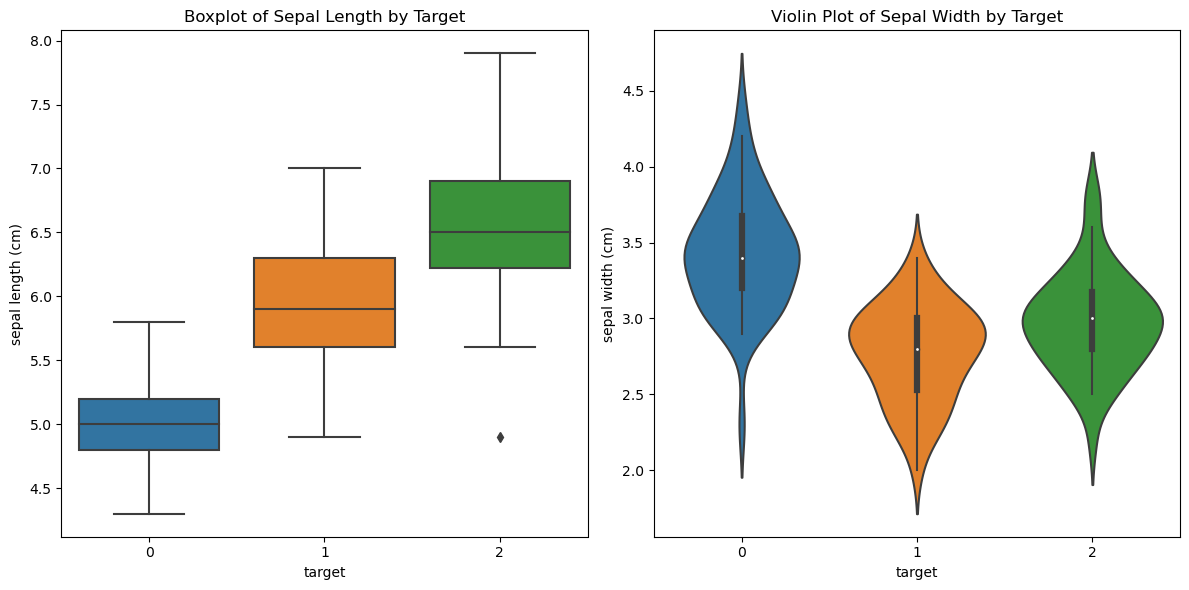

In [21]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='target', y='sepal length (cm)', data=iris_df)
plt.title('Boxplot of Sepal Length by Target')
plt.subplot(1, 2, 2)
sns.violinplot(x='target', y='sepal width (cm)', data=iris_df)
plt.title('Violin Plot of Sepal Width by Target')
plt.tight_layout()
plt.show()

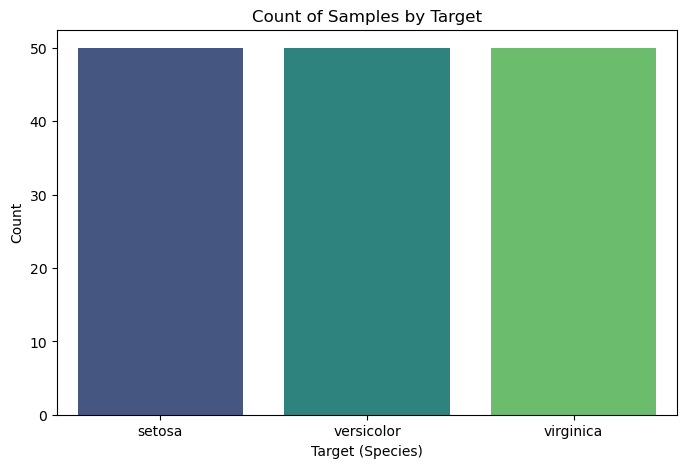

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=iris_df, palette='viridis')
plt.title('Count of Samples by Target')
plt.xlabel('Target (Species)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=iris.target_names)
plt.show()

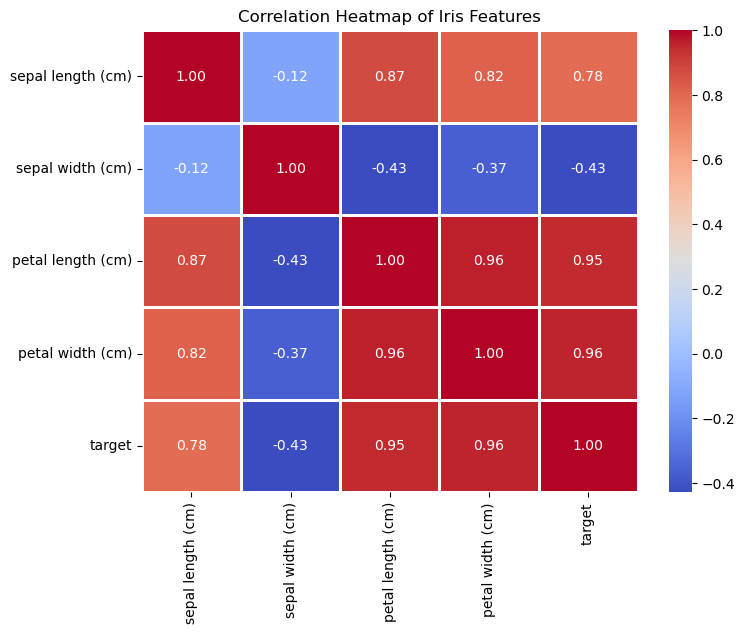

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.corr(), annot=True, cmap='coolwarm', fmt='.2f',
linewidths=1, linecolor='white')
plt.title('Correlation Heatmap of Iris Features')
plt.show()

In [24]:
X = iris_df.drop('target', axis=1) # Features
y = iris_df['target'] 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=123)

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
model = LogisticRegression()

In [28]:
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
%%time
y_pred = model.predict(X_test)

Wall time: 0 ns


In [30]:
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9833333333333333
Testing Accuracy: 0.9666666666666667


In [31]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]


In [32]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred,
target_names=iris.target_names))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.86      1.00      0.92         6
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [33]:
print("\nProbabilities of Classification:")
probabilities = model.predict_proba(X_test[:5])
for i, prob in enumerate(probabilities):
    print(f"Sample {i+1}: {list(zip(iris.target_names, prob))}")


Probabilities of Classification:
Sample 1: [('setosa', 0.0010018961891855032), ('versicolor', 0.5649143036280491), ('virginica', 0.43408380018276543)]
Sample 2: [('setosa', 7.109171804075661e-05), ('versicolor', 0.07751354594259173), ('virginica', 0.9224153623393675)]
Sample 3: [('setosa', 2.8914132694143916e-05), ('versicolor', 0.034078036275794955), ('virginica', 0.9658930495915108)]
Sample 4: [('setosa', 0.07748009958056602), ('versicolor', 0.8790175607424507), ('virginica', 0.043502339676983255)]
Sample 5: [('setosa', 0.9910507042315119), ('versicolor', 0.008949275268538443), ('virginica', 2.0499949756406386e-08)]


####  3. Multinomial on Iris
Copy EDA from #2

In [34]:
model = LogisticRegression(multi_class="multinomial")

In [35]:
%%time
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Wall time: 7 ms


In [36]:
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

In [37]:
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9833333333333333
Testing Accuracy: 0.9666666666666667


In [38]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]


In [39]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred,
target_names=iris.target_names))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.86      1.00      0.92         6
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [40]:
print("\nProbabilities of Classification:")
probabilities = model.predict_proba(X_test[:5])
for i, prob in enumerate(probabilities):
     print(f"Sample {i+1}: {list(zip(iris.target_names, prob))}")


Probabilities of Classification:
Sample 1: [('setosa', 0.0010018961891855032), ('versicolor', 0.5649143036280491), ('virginica', 0.43408380018276543)]
Sample 2: [('setosa', 7.109171804075661e-05), ('versicolor', 0.07751354594259173), ('virginica', 0.9224153623393675)]
Sample 3: [('setosa', 2.8914132694143916e-05), ('versicolor', 0.034078036275794955), ('virginica', 0.9658930495915108)]
Sample 4: [('setosa', 0.07748009958056602), ('versicolor', 0.8790175607424507), ('virginica', 0.043502339676983255)]
Sample 5: [('setosa', 0.9910507042315119), ('versicolor', 0.008949275268538443), ('virginica', 2.0499949756406386e-08)]


#### 4. Implement SVM Classifier (Iris Datasets)
Copy EDA from #2

In [41]:
X = iris_df.drop('target', axis=1) # Features
y = iris_df['target'] # Target (labels)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=123)

In [43]:
%%time
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

Wall time: 2.23 ms


SVC(kernel='linear')

In [44]:
y_pred = clf.predict(X_test)

In [45]:
print(classification_report(y_test, y_pred))
print("Training Accuracy:", accuracy_score(y_train, clf.predict(X_train)))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.83      0.91         6
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

Training Accuracy: 0.9916666666666667
Testing Accuracy: 0.9666666666666667


In [46]:
%%time
from sklearn.model_selection import GridSearchCV
param_grid = {'kernel': ['linear', 'rbf'],'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_params)
print(best_model)

{'C': 10, 'kernel': 'rbf'}
SVC(C=10)
Wall time: 109 ms


In [47]:
y_pred = best_model.predict(X_test)

In [48]:
print(classification_report(y_test, y_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Testing Accuracy: 1.0


#### 5. Train and fine-tune a Decision Tree for Moon dataset

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

In [50]:
X, y = make_moons(n_samples=1000, noise=0.3)

In [51]:
print("Data Shape:", X.shape)
print("Description of first 5 rows:")
print(X[:5])
print("Description of target variable:")
print(pd.Series(y).value_counts())

Data Shape: (1000, 2)
Description of first 5 rows:
[[-0.54244146  1.05633271]
 [ 0.15013698 -0.42701082]
 [ 0.97918934  0.14213435]
 [ 0.94814973  0.00904938]
 [ 1.06451725 -0.42572539]]
Description of target variable:
0    500
1    500
dtype: int64


In [52]:
import numpy as np
print("Missing values in features:", np.isnan(X).sum(axis=0))

Missing values in features: [0 0]


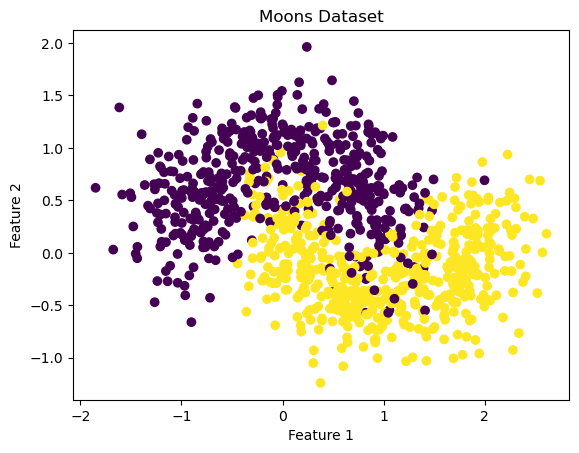

In [53]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=123)

In [55]:
%%time
clf = DecisionTreeClassifier()
param_grid = {
 'max_depth': [2, 3, 4, 5],
 'min_samples_split': [2, 5, 10]
}
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy')
grid_clf.fit(X_train, y_train)

Wall time: 67.2 ms


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [56]:
best_model = grid_clf.best_estimator_
print("Best Hyperparameters:", grid_clf.best_params_)

Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 5}


In [57]:
y_pred = best_model.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.87


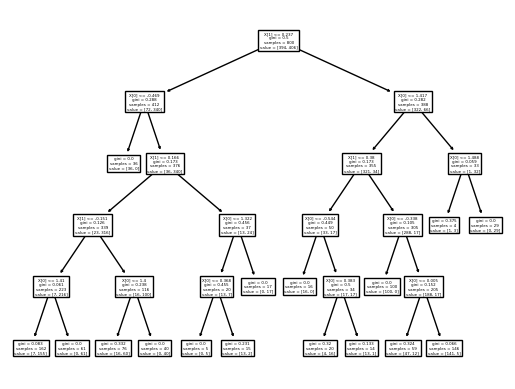

In [59]:
plot_tree(best_model)
plt.show()

#### 6. : Train an SVM regression on the California Housing Dataset

In [60]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns # For visualization
import matplotlib.pyplot as plt # For visualization

In [61]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [62]:
print(X.describe()) # Summary statistics

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -1

In [63]:
print("Missing values:", X.isnull().sum())

Missing values: MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


C:\Users\91773\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


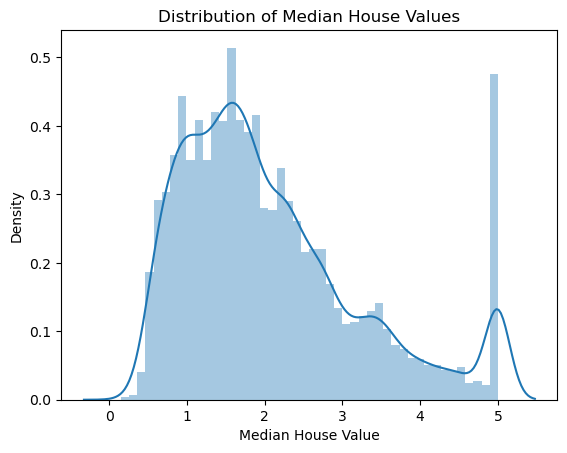

In [64]:
sns.distplot(y)
plt.xlabel("Median House Value")
plt.ylabel("Density")
plt.title("Distribution of Median House Values")
plt.show()

In [65]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state=123)

In [66]:
%%time
svr = SVR(kernel='rbf') # Experiment with 'linear' or other kernels
svr.fit(X_train, y_train)

Wall time: 7.76 s


SVR()

In [67]:
%%time
# Make Predictions and Evaluate Performance
y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.33967352710769244
R-squared: 0.7445706774731202
Wall time: 3.34 s


In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
# Define a parameter grid to explore
param_grid = {
 'kernel': ['linear', 'rbf'], # Experiment with different kernels
 'C': [0.01, 0.1, 1, 10, 100], # Regularization parameter
 'gamma': [0.001, 0.01, 0.1, 1], # Gamma for RBF kernel (optional)
}


In [69]:
%%time
grid_search = GridSearchCV(SVR(), param_grid, cv=5) # 5-fold crossvalidation
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)
# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

Wall time: 2h 33min 21s


In [70]:
# Use the best model for prediction and evaluation
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#### 7. Implement Batch Gradient Descent with Early Stopping for Softmax Regression.


In [71]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [72]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [73]:
X = np.c_[np.ones(X.shape[0]), X]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits, axis=1, keepdims=True))
    return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)
def compute_loss_and_gradients(X, y, theta):
    logits = X.dot(theta)
    y_proba = softmax(logits)
    m = X.shape[0]
    entropy_loss = -np.mean(np.log(y_proba[np.arange(m), y]))
    gradients = (1/m) * X.T.dot(y_proba - np.eye(np.max(y) + 1)[y])
    return entropy_loss, gradients
def predict(X, theta):
    logits = X.dot(theta)
    return np.argmax(softmax(logits), axis=1)
def softmax_regression(X_train, y_train, X_val, y_val, learning_rate=0.01,n_epochs=1000, tol=1e-4, patience=5):
    n_inputs = X_train.shape[1]
    n_outputs = np.max(y_train) + 1
    theta = np.random.randn(n_inputs, n_outputs)

    best_loss = np.inf
    epochs_without_improvement = 0


In [89]:
for epoch in range(n_epochs):
    loss, gradients = compute_loss_and_gradients(X_train, y_train, theta)
    theta = theta - learning_rate * gradients

    val_loss, _ = compute_loss_and_gradients(X_val, y_val, theta)

    if val_loss < best_loss - tol:
        best_loss = val_loss
        epochs_without_improvement = 0
    else:
         epochs_without_improvement += 1

    if epochs_without_improvement >= patience:
        print(f"Early stopping at epoch {epoch}")
        break

return theta

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

In [78]:
X_train_split, X_val_split, y_train_split, y_val_split =train_test_split(X_train, y_train, test_size=0.2, random_state=123)

In [79]:
%%time
theta = softmax_regression(X_train_split, y_train_split, X_val_split,y_val_split)

Wall time: 7.17 ms


#### 8. Implement MLP for Classification of Handwritten digits(MNIST \Datasets)

In [81]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
import matplotlib.pyplot as plt

In [82]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
x_train = x_train / 255.0
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

(60000, 28, 28)


In [83]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
     Conv2D(64, (3, 3), activation='relu'),
     MaxPooling2D((2, 2)),
     Flatten(),
     Dense(128, activation='relu'),
     Dense(10, activation='softmax')
])

C:\Users\91773\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
%%time
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9023 - loss: 0.3129
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9863 - loss: 0.0439
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9918 - loss: 0.0260
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9944 - loss: 0.0185
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9954 - loss: 0.0141
Wall time: 1min 8s


In [90]:
index = 0 # Replace with the index of the image you want to use
single_image = x_test[index]
input_image = np.expand_dims(single_image, axis=0)

In [91]:
predicted_probabilities = model.predict(input_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


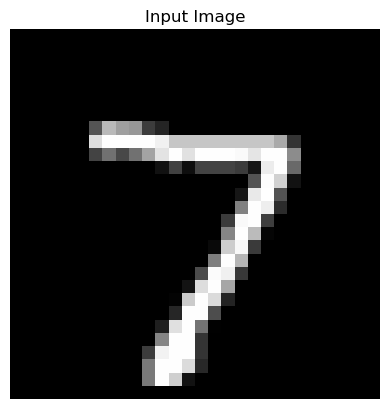

In [92]:
plt.imshow(single_image, cmap='gray')
plt.title('Input Image')
plt.axis('off')
plt.show()

In [93]:
print("Predicted Probabilities:", predicted_probabilities)
predicted_class = np.argmax(predicted_probabilities)
print("Predicted Class:", predicted_class)

Predicted Probabilities: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Predicted Class: 7


#### 9. Classification of Image of clothing using Tensorflow(Fashion MNIST dataset)

In [94]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [96]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

In [97]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [98]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [99]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [100]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [101]:
history = model.fit(train_images, train_labels, epochs=10,validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7388 - loss: 0.7059 - val_accuracy: 0.8703 - val_loss: 0.3572
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8773 - loss: 0.3372 - val_accuracy: 0.8855 - val_loss: 0.3175
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8950 - loss: 0.2837 - val_accuracy: 0.8941 - val_loss: 0.2948
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9101 - loss: 0.2417 - val_accuracy: 0.8968 - val_loss: 0.2760
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9180 - loss: 0.2202 - val_accuracy: 0.9031 - val_loss: 0.2691
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9252 - loss: 0.1982 - val_accuracy: 0.9055 - val_loss: 0.2607
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9332 - loss: 0.1780 - val_accuracy: 0.9034 - val_loss: 0.2821
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9367 - loss: 0

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [102]:
import numpy as np
predictions = model.predict(test_images)
# Define a function to plot the images and predictions
def plot_image(predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[predicted_label]}{100*np.max(predictions_array):2.0f}% ({class_names[true_label]})",color=color)

def plot_value_array(predictions_array, true_label):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [103]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

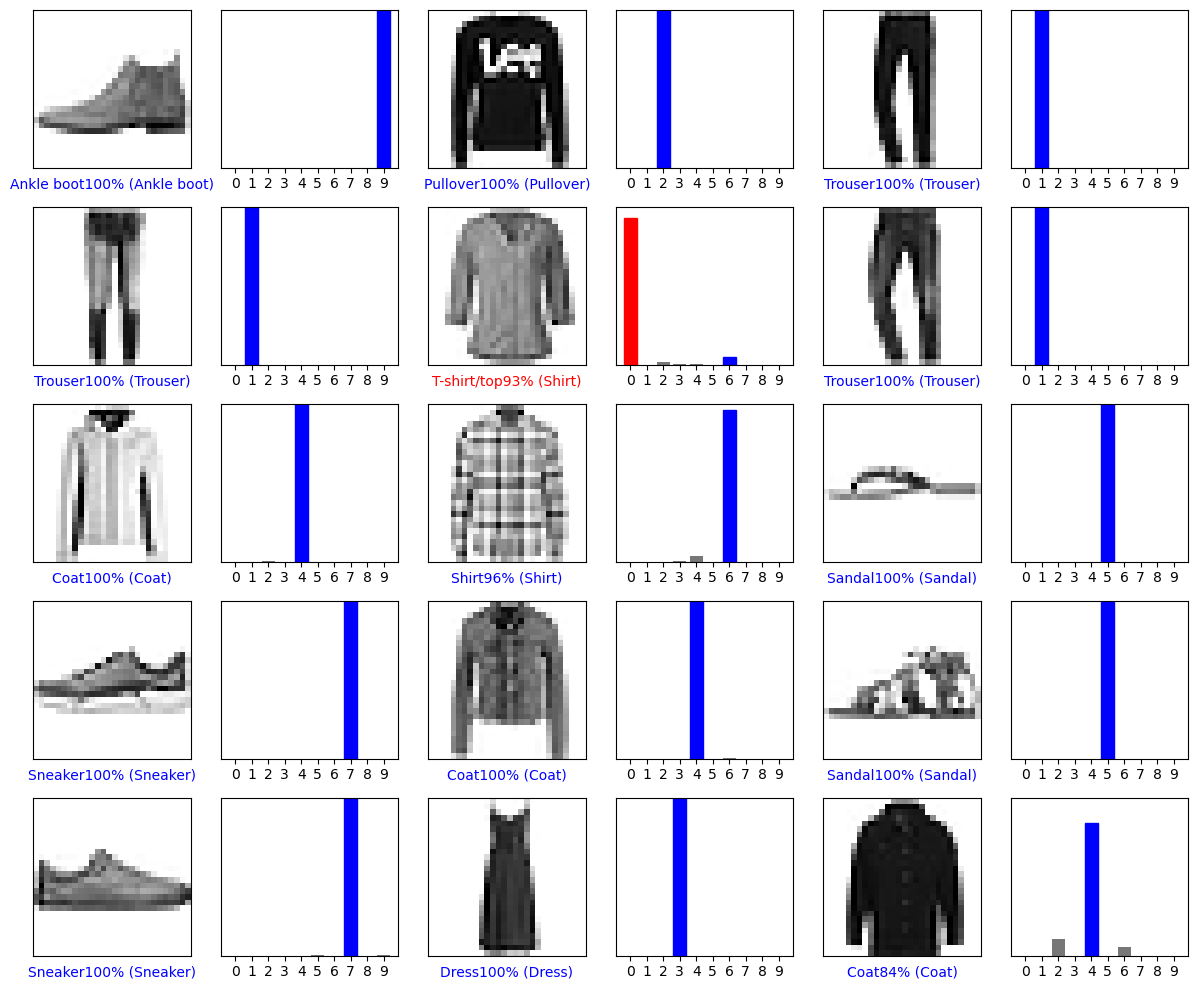

In [104]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(predictions[i], test_labels[i], test_images[i].reshape(28, 28))
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(predictions[i], test_labels[i])
plt.tight_layout()
plt.show()

#### 10. Implement Regression to predict fuel efficiency using TensorFlow(Auto MPG dataset).

In [105]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
url = "auto-mpg.csv"

In [ ]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower',
'Weight', 'Acceleration', 'Model Year', 'Origin']

In [ ]:
dataset = pd.read_csv(url, names=column_names, na_values='?',comment='\t', sep=',', skipinitialspace=True)

In [ ]:
dataset.info()

In [ ]:
dataset.describe()

In [ ]:
dataset = dataset.dropna()

In [ ]:
for column in ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight','Acceleration', 'Model Year']:
    dataset[column] = pd.to_numeric(dataset[column], errors='coerce')

In [ ]:
print("NaN values before dropping: \n", dataset.isnull().sum())

In [ ]:
dataset['Origin'] = dataset['Origin'].astype(str)

In [ ]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='',prefix_sep='')

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [ ]:
assert not train_features.isnull().any().any(), "There are NaN values in the training features"
assert not test_features.isnull().any().any(), "There are NaN values in the test features"
assert not train_labels.isnull().any(), "There are NaN values in the training labels"
assert not test_labels.isnull().any(), "There are NaN values in the test labels"

In [ ]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

In [ ]:
def build_model():
    model = models.Sequential([
    layers.Dense(64, activation='relu',input_shape=[train_features.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
return model
model = build_model()

In [ ]:
model.compile(optimizer='adam',loss='mse',metrics=['mae', 'mse'])
history = model.fit(train_features, train_labels,epochs=100, validation_split=0.2, verbose=0)

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MPG]')
plt.plot(hist['epoch'], hist['mae'], label='Train Error')
plt.plot(hist['epoch'], hist['val_mae'], label='Val Error')
plt.legend()
plt.subplot(1, 2, 2)
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error [MPG^2]')
plt.plot(hist['epoch'], hist['mse'], label='Train Error')
plt.plot(hist['epoch'], hist['val_mse'], label='Val Error')
plt.legend()
plt.show()

In [ ]:
test_loss, test_mae, test_mse = model.evaluate(test_features, test_labels,verbose=2)
print(f'\nTest MAE: {test_mae:.2f} MPG')

In [ ]:
test_predictions = model.predict(test_features).flatten()
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.plot([-100, 100], [-100, 100])

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
plt.ylabel('Count')
plt.show()